# ngmix validation

Plot size for ngmix/metacal runs on galaxy profiles.

Run `fitting_sp_v3.py` first.

The `sp_validation` kernel works.

In [43]:
import numpy as np
from astropy.io import ascii
import matplotlib.pylab as plt
from adjustText import adjust_text

from cs_util import plots as csp

In [81]:
# ShapePipe and ngmix interface
#keys = ["sp", "ng"]
keys = ["sp"]

markers = {"sp": "o", "ng": "s"}
colors = {"sp": "b", "ng": "orange"}
colors2 = {"sp": "g", "ng": "red"}

color_arr = ["b", "orange"]

In [45]:
%pwd

'/home/mkilbing/astro/repositories/github/shapepipe/scripts/python'

In [65]:
gal_hlr_arr = [0.5, 1.0]

psf_arr = [0.68, 0.93]

dat = {}
dirs = []

for gal_hlr in gal_hlr_arr:
    for psf in psf_arr:
        direc = f"gal_hlr_{gal_hlr}_psf_{psf}"
        dirs.append(direc)
        print(direc)
        # Open ascii file with results from fitting runs.
        dat[dir] = ascii.read(f"T_gal_test/{direc}/T.txt", format="commented_header")

gal_hlr_0.5_psf_0.68
gal_hlr_0.5_psf_0.93
gal_hlr_1.0_psf_0.68
gal_hlr_1.0_psf_0.93


In [53]:
# Compute mean and standard deviation of object size for each flux

T_mean = {}
T_std = {}
SNR_mean = {}

for key in keys:
    T_mean[key] = {}
    T_std[key] = {}
    SNR_mean[key] = {}
    for dir in dirs:
        T_mean[key][dir] = []
        T_std[key][dir] = []
        SNR_mean[key][dir] = []

n_per_flux = -1
dat0 = dat[dirs[0]]
fluxes = list(set(dat0["Flux"]))
for flux in fluxes:
    idx = np.where(dat0["Flux"] == flux)[0]
    if n_per_flux == -1:
        n_per_flux = len(idx)
    
    for key in keys:
        for dir in dirs:
            mydat = dat[dir]
            T_mean[key][dir].append(np.mean(mydat[f"T_{key}"][idx]))
            T_std[key][dir].append(np.std(mydat[f"T_{key}"][idx]))
            SNR_mean[key][dir].append(np.mean(mydat[f"SNR_{key}"][idx]))

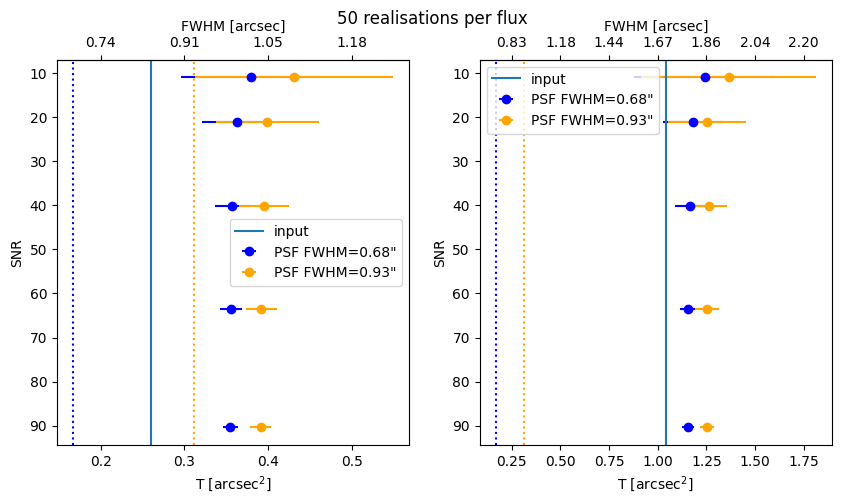

In [85]:
# Plot mean and std

fig, axes = plt.subplots(ncols=len(gal_hlr_arr), figsize=(10, 5))

for idx, gal_hlr in enumerate(gal_hlr_arr): 
    for key in keys:
        for jdx, psf in enumerate(psf_arr):
            direc = f"gal_hlr_{gal_hlr}_psf_{psf}"
            label = f"PSF FWHM={psf}\""
            axes[idx].errorbar(T_mean[key][direc], SNR_mean[key][dir], xerr=T_std[key][direc], fmt=markers[key], label=label, color=color_arr[jdx])

            T_psf = psf ** 2 / ( 4 * np.log(2) )
            axes[idx].axvline(x=T_psf, ls=":", color=color_arr[jdx])

    axes[idx].invert_yaxis()
    axes[idx].set_xlabel("T [arcsec$^2$]")
    axes[idx].set_ylabel("SNR")

    sigma_gal = gal_hlr / ( 2 * np.log(2) )
    T_gal = 2 * sigma_gal ** 2
    axes[idx].axvline(x=T_gal, ls="-", label="input")
    axes[idx].legend()
    
    ax2 = axes[idx].secondary_xaxis('top')

    # Define the tick positions of the first x-axis = T
    x_ticks = axes[idx].get_xticks()

    # Apply the transformation FWHM = 2 sqrt(ln 2 * T)
    new_x_ticks = 2 * np.sqrt(np.log(2) * x_ticks)

    # Set the new ticks and labels for the second x-axis
    ax2.set_xticks(x_ticks)
    ax2.set_xticklabels([f'{tick:.2f}' for tick in new_x_ticks])
    ax2.set_xlabel(r'FWHM [arcsec]')
    
fig.suptitle(f"{n_per_flux} realisations per flux")
fig.savefig(f"T.png")